## RFM 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/elley/Desktop/Python/project_4_portfolio/mart_codeit/EDA3_finish.csv')

In [3]:
grade_labels = list(range(1, 4))

In [4]:
grade_labels

[1, 2, 3]

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head(2)

,ID,signup_ym,birth_year,annual_income,matrimony,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,age
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1,59
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0,62


### Recency 등급을 3개로 나눈다. qcut을 이용하여 데이터 분포를 기반으로 3개의 구간으로 나눈다.

In [7]:
recency_grade = pd.qcut(x=df['recency'], q=3, labels=grade_labels[::-1])

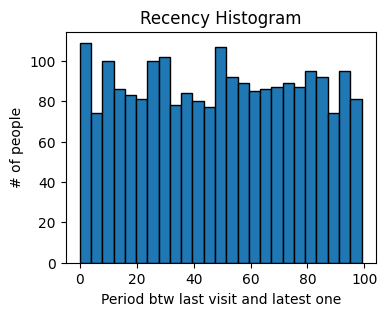

In [8]:
plt.figure(figsize=(4, 3))
plt.hist(df['recency'], bins = 25, edgecolor='black')
plt.title('Recency Histogram')
plt.xlabel('Period btw last visit and latest one')
plt.ylabel('# of people')
plt.show()

In [9]:
df['recency_grade'] = recency_grade

In [10]:
df['recency_grade'].value_counts()

recency_grade
3    756
1    733
2    724
Name: count, dtype: int64

In [11]:
frequency_grade = pd.qcut(x=df['num_purchase_total'], q=3, labels=grade_labels[::])

In [12]:
df['frequency_grade'] = frequency_grade

In [13]:
df['frequency_grade'].value_counts()

frequency_grade
1    856
2    681
3    676
Name: count, dtype: int64

Text(0, 0.5, '# of people')

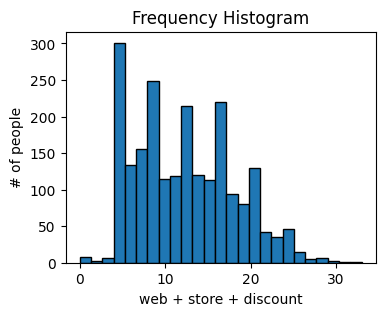

In [14]:
plt.figure(figsize=(4, 3))
plt.hist(df['num_purchase_total'], bins = 25, edgecolor='black')
plt.title('Frequency Histogram')
plt.xlabel('web + store + discount')
plt.ylabel('# of people')

In [15]:
monetary_grade = pd.qcut(x=df['amount_total'], q=3, labels=grade_labels[::])

In [16]:
df['monetary_grade'] = monetary_grade

Text(0, 0.5, '# of people')

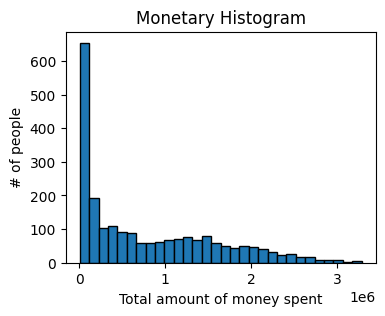

In [17]:
plt.figure(figsize=(4, 3))
plt.hist(df['amount_total'], bins = 30, edgecolor='black')
plt.title('Monetary Histogram')
plt.xlabel('Total amount of money spent')
plt.ylabel('# of people')

In [18]:
df['monetary_grade'].value_counts()

monetary_grade
1    738
3    738
2    737
Name: count, dtype: int64

In [19]:
# 1. Recency / Frequency / Monetary 등급별 매출액 보기
recency_group = df.groupby('recency_grade').sum(numeric_only=True).reset_index()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20520\509854325.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recency_group = df.groupby('recency_grade').sum(numeric_only=True).reset_index()


In [20]:
pd.set_option('display.max_columns', None)
recency_group

,recency_grade,ID,birth_year,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,age
0,3,4356110,1494914,5.208329e+10,681,12076,294140600,26768300,161972200,37620700,25547600,42510000,588559400,3106,4391,1712,9209,54,12,67,55,60,179,35230
1,2,4006526,1430871,4.839501e+10,725,35877,294123700,23676900,151754200,35049300,25147200,41278900,571030200,2993,4241,1771,9005,47,8,47,52,48,95,34505
2,1,4001172,1449133,4.980112e+10,691,60501,289632200,25286300,166608000,35603100,27081600,42539900,586751100,2947,4215,1663,8825,41,10,49,57,53,59,34459


In [21]:
plt.rc('font', family='Malgun Gothic')

<Axes: title={'center': 'Recency 등급별 매출 기여도'}>

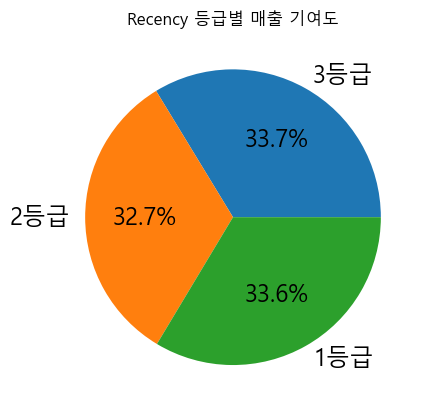

In [22]:
recency_group['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels[::-1]],
    title='Recency 등급별 매출 기여도',
    ylabel='',
    textprops={'fontsize': 17} 
)

In [23]:
frequency_group = df.groupby('frequency_grade').sum(numeric_only=True).reset_index()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20520\50987308.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequency_group = df.groupby('frequency_grade').sum(numeric_only=True).reset_index()


<Axes: title={'center': 'Frequency 등급별 매출 기여도'}>

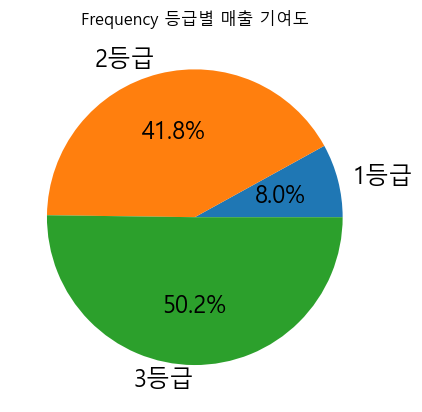

In [24]:
frequency_group['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels[::]],
    title='Frequency 등급별 매출 기여도',
    ylabel='',
    textprops={'fontsize': 17} 
)

In [25]:
monetary_group = df.groupby('monetary_grade').sum(numeric_only=True).reset_index()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20520\690567101.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monetary_group = df.groupby('monetary_grade').sum(numeric_only=True).reset_index()


<Axes: title={'center': 'Monetary 등급별 매출 기여도'}>

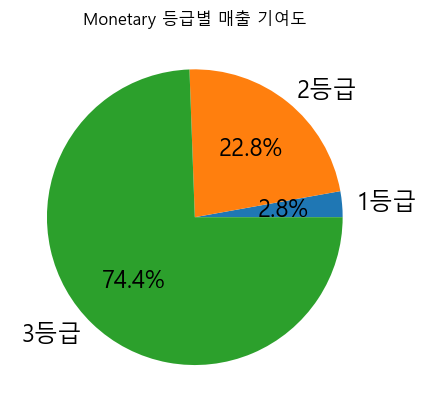

In [26]:
monetary_group['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels[::]],
    title='Monetary 등급별 매출 기여도',
    ylabel='',
    textprops={'fontsize': 17}
)

### **먼저 Recency, Frequency, Monetary 3 항목 모두 가중치를 동일하게 두고 등급을 매긴다.

In [27]:
weight = {}
weight['recency'] = 1 / 3
weight['frequency'] = 1 / 3
weight['monetary'] = 1 / 3

In [28]:
df['rfm_score'] = (
    weight['recency'] * df['recency_grade'].astype('int')
    + weight['frequency'] * df['frequency_grade'].astype('int')
    + weight['monetary'] * df['monetary_grade'].astype('int')
)

In [29]:
def rfm_segment_bins(x):
    if x < 5 / 3:
        return 1
    elif x <= 7 / 3:
        return 2
    else:
        return 3

In [30]:
df['rfm_segment'] = df['rfm_score'].apply(rfm_segment_bins)

In [31]:
df['rfm_segment'].value_counts()

rfm_segment
1    930
2    814
3    469
Name: count, dtype: int64

In [32]:
groupby_rfm_segment = df.groupby('rfm_segment').sum(numeric_only=True).reset_index()

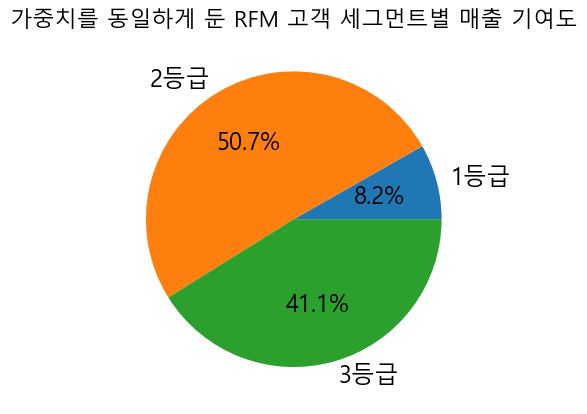

In [33]:
groupby_rfm_segment['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    ylabel='',
    textprops={'fontsize': 17}

)
plt.title('가중치를 동일하게 둔 RFM 고객 세그먼트별 매출 기여도', fontsize=16)
plt.show()

### 이제 Recency, Frequency, Monetary 세 기준의 매출 기여도의 차이가 다름을 바탕으로 중요도(weight)를 다르게 설정한다

In [34]:
# 가중치 재설정
weight = {}
weight['recency'] = 0.2
weight['frequency'] = 0.4
weight['monetary'] = 0.4

In [35]:
# 가중합 다시 계산
df['rfm_score'] = (weight['recency'] * df['recency_grade'].astype('int')
    + weight['frequency'] * df['frequency_grade'].astype('int')
    + weight['monetary'] * df['monetary_grade'].astype('int'))

In [36]:
# RFM 고객 지표 구간화
df['rfm_segment'] = df['rfm_score'].apply(rfm_segment_bins)

In [37]:
df['rfm_segment'].value_counts()

rfm_segment
1    806
3    793
2    614
Name: count, dtype: int64

In [38]:
groupby_rfm_segment = df.groupby('rfm_segment').sum(numeric_only=True).reset_index()

In [39]:
groupby_rfm_segment

,rfm_segment,ID,birth_year,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,age,rfm_score
0,1,4542263,1595505,3.483451e+10,1000,41227,26341900,4095000,16593200,6099600,4169100,13094900,70393700,1337,2342,1386,5065,0,2,57,5,1,60,35839,1002.0
1,2,3449995,1213196,4.510823e+10,547,34492,231734100,22596600,137338500,31037500,22222200,39925600,484854500,2741,3532,1604,7877,31,6,44,48,37,78,29540,1257.0
2,3,4371550,1566217,7.033668e+10,550,32735,619820500,49039900,326402700,71136000,51385100,73308300,1191092500,4968,6973,2156,14097,111,22,62,111,123,195,38815,2099.6


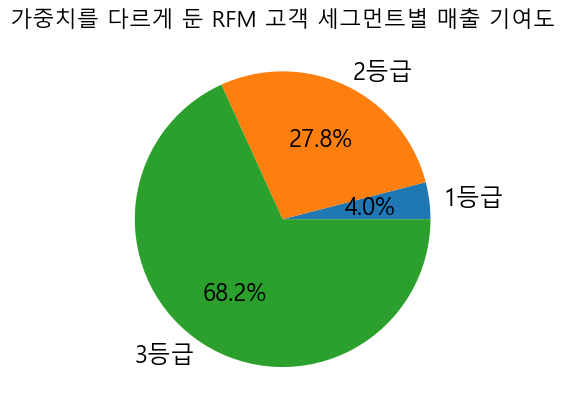

In [40]:
groupby_rfm_segment['amount_total'].plot(
    kind='pie',
    autopct='%.1f%%',
    labels=[f'{x}등급' for x in grade_labels],
    ylabel='',
    textprops={'fontsize': 17}
)
plt.title('가중치를 다르게 둔 RFM 고객 세그먼트별 매출 기여도', fontsize=16)
plt.show()

### 가중치를 다르게 두고 다시 분석하였을 때 3등급은 무려 절반 이상, 매출의 68%를 차지한다. 그림으로 보면 대략 3/4 정도의 비율을 차지.

### 3등급 세그먼트의 특성을 다른 등급과 비교하여 보면 마트의 마케팅 전략 수립에 도움이 될만한 정보를 얻을 수 있다.

### 가지고 있는 데이터를 통해 알아볼 수 있는 것들은 

###   등급 간 연령대 분포, 프로모션 참여율 차이, 품목별 매출비율의 차이 등

In [41]:
#### 먼저 연령별 분포를 알아본다. 연령대 표시하기 10대~60대
df['age'] = 2024 - df['birth_year']

Text(0, 0.5, '# of people')

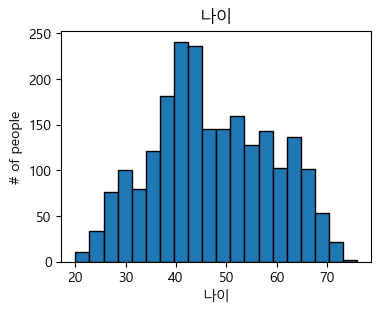

In [42]:
plt.figure(figsize=(4, 3))
plt.hist(df['age'], bins = 20, edgecolor='black')
plt.title('나이')
plt.xlabel('나이')
plt.ylabel('# of people')

In [43]:
def age(x):
    if 10<=x<20:
        return '10대'
    if 20<=x<30:
        return '20대'
    if 30<=x<40:
        return '30대'
    if 40<=x<50:
        return '40대'
    if 50<=x<60:
        return '50대'
    if 60<=x<70:
        return '60대'
    if 70<=x<80:
        return '80대'

In [44]:
df['age_group'] = df['age'].apply(age)

In [45]:
df.head(2)

,ID,signup_ym,birth_year,annual_income,matrimony,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,age,recency_grade,frequency_grade,monetary_grade,rfm_score,rfm_segment,age_group
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1,59,2,2,3,2.4,3,50대
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0,62,2,1,1,1.2,1,60대


In [46]:
## 100살이 넘는 고객 제외
df.to_csv('C:/Users/elley/Desktop/Python/project_4_portfolio/mart_codeit/EDA4_finsish.csv', index=False, encoding='utf-8')

In [47]:
rfm_age = df.groupby(['rfm_segment', 'age_group']).size().reset_index()
rfm_age

,rfm_segment,age_group,0
0,1,20대,62
1,1,30대,213
2,1,40대,293
3,1,50대,140
4,1,60대,94
5,1,80대,4
6,2,20대,38
7,2,30대,111
8,2,40대,179
9,2,50대,155


In [48]:
third_seg_age = rfm_age[rfm_age['rfm_segment']==3] 
third_seg_age.T

,12,13,14,15,16,17
rfm_segment,3,3,3,3,3,3
age_group,20대,30대,40대,50대,60대,80대
0,46,130,245,185,164,23


In [49]:
ag = ['20대', '30대', '40대', '50대', '60대', '80대']
type(ag)

list

In [50]:
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')  

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20520\4199970763.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  age_i.plot(
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20520\4199970763.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  age_i.plot(
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20520\4199970763.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, s

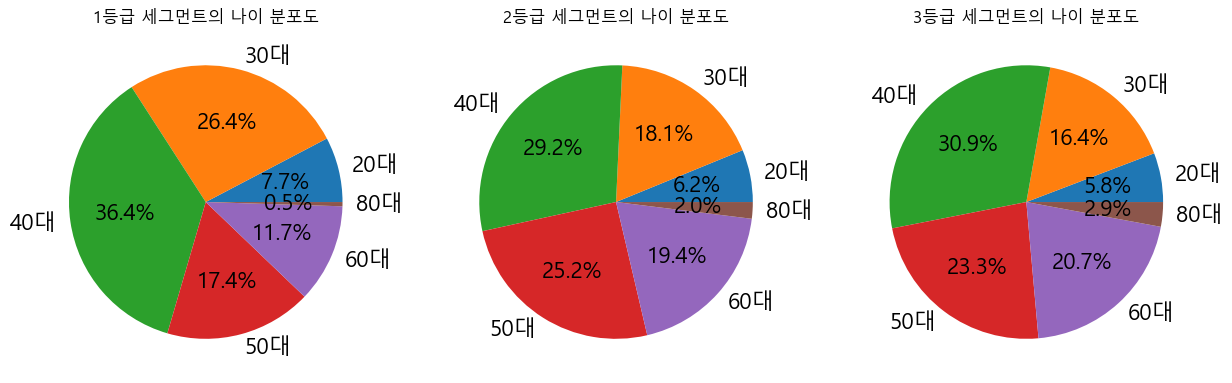

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ag = ['20대', '30대', '40대', '50대', '60대', '80대']

for i in range(1,4):
    age_i = rfm_age[rfm_age['rfm_segment']==i]
    age_i = age_i.T
    age_i = age_i.iloc[2,:]
    age_i.plot(
    kind='pie',
    # y=gen_i.columns[0]
    title=f'{i}등급 세그먼트의 나이 분포도',
    labels=[f'{x}' for x in ag],
    autopct='%.1f%%',
    ylabel='',
    textprops={'fontsize': 16},
    ax = axes[i-1]
)

plt.show()

#### 등급 간 뚜렷한 차이는 보여지지 않지만 전반적으로 중장년층(40, 50대)의 비율이 높은 것을 세 등급에서 모두 다 볼 수 있다.

In [52]:
col_index = df.columns.get_loc('amount_alcohol')
print(col_index)

7


In [53]:
def category(x):
    total = df.groupby('rfm_segment').agg({df.columns[x]: 'sum'}).reset_index()
    return total

In [54]:
category(7)

,rfm_segment,amount_alcohol
0,1,26341900
1,2,231734100
2,3,619820500


In [55]:
results = {}

for i in range(7, 13):  
    df_i = category(i)  
    results[f'df_{i}'] = df_i  
    
    if i > 7: 
        df_prev = results[f'df_{i-1}']  
        df_i = pd.concat([df_i, df_prev], axis=1, join='outer') 

    results[f'df_{i}'] = df_i

In [56]:
category = results['df_12']
rfm = category.iloc[:, 0]

In [57]:
amount = category.drop(columns=[category.columns[2], category.columns[4], category.columns[6], category.columns[8], category.columns[10]])

In [58]:
concat = pd.concat([rfm, amount], axis=1)
concat

,rfm_segment,amount_general,amount_snack,amount_fish,amount_meat,amount_fruit,amount_alcohol
0,1,13094900,4169100,6099600,16593200,4095000,26341900
1,2,39925600,22222200,31037500,137338500,22596600,231734100
2,3,73308300,51385100,71136000,326402700,49039900,619820500


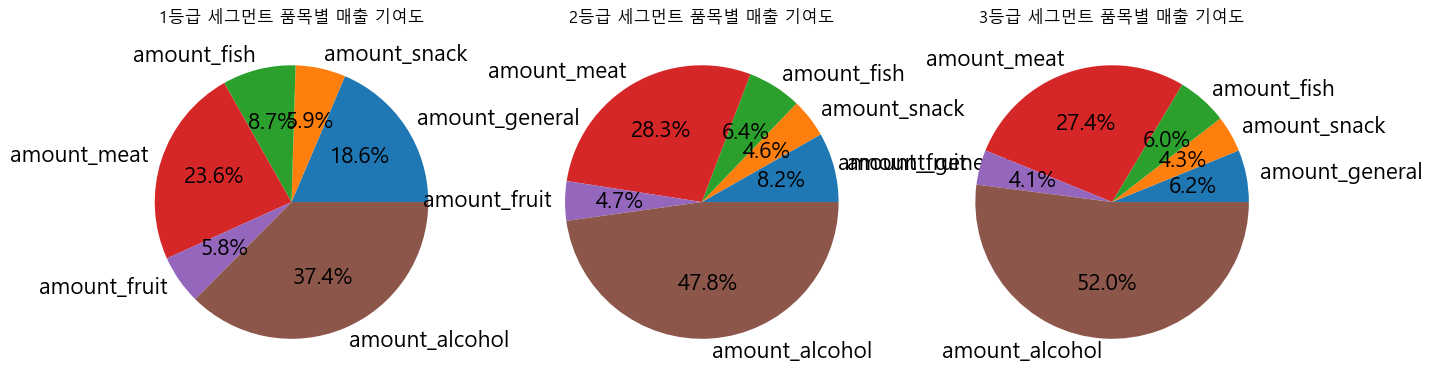

In [59]:
# 서브플롯 크기 조정 및 생성
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1행 3열의 서브플롯 생성

# 서브플롯의 레전드가 동일하므로 새로운 이미지로 레전드 표시
# fig, legend_ax = plt.subplots()
am = ['amount_general', 'amount_snack', 'amount_fish', 'amount_meat', 'amount_fruit', 'amount_alcohol']


# 서브플롯
for i in range(1, 4):
    concat_i = pd.DataFrame(concat.iloc[i-1, 1:7])
    
    # 파이차트 그리기
    concat_i.plot(
        kind='pie',
        y=concat_i.columns[0],
        autopct='%.1f%%',
        labels=[f'{x}' for x in am],
        title=f'{i}등급 세그먼트 품목별 매출 기여도',
        ylabel='',
        legend=False,
        textprops={'fontsize': 16},
        ax = axes[i-1])

plt.show()

### 등급별 프로모션 참여율 알아보기 

In [60]:
prom = df.groupby('rfm_segment')[['promotion_1', 'promotion_2', 'promotion_3', 'promotion_4', 'promotion_5', 'promotion_6']].sum()
prom = prom.reset_index()

In [61]:
print(df[df['rfm_segment'] == 1].shape)
print(df[df['rfm_segment'] == 2].shape)
print(df[df['rfm_segment'] == 3].shape)

(806, 31)
(614, 31)
(793, 31)


In [62]:
prom_1 = prom.iloc[0, 1:]/805

In [63]:
prom_2 = prom.iloc[1, 1:]/615

In [64]:
prom_3 = prom.iloc[2, 1:]/793

In [65]:
prom = pd.concat([prom_1, prom_2, prom_3], axis=1)
prom = prom.T
prom = prom.set_index(concat['rfm_segment'])
prom

,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
rfm_segment,,,,,,
1,0.000000,0.002484,0.070807,0.006211,0.001242,0.074534
2,0.050407,0.009756,0.071545,0.078049,0.060163,0.126829
3,0.139975,0.027743,0.078184,0.139975,0.155107,0.245902


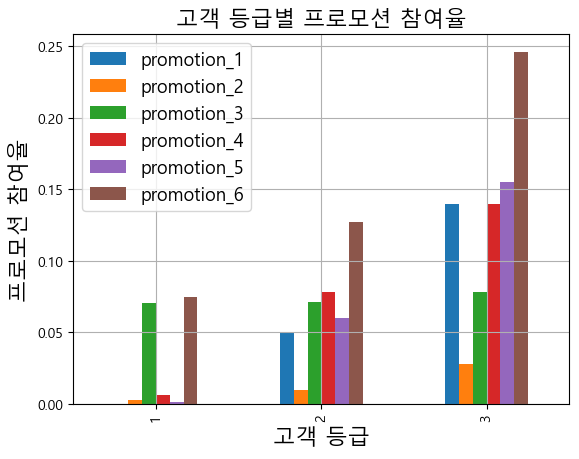

In [66]:
prom.plot(kind='bar')
plt.title('고객 등급별 프로모션 참여율', fontsize = 16)
plt.xlabel('고객 등급', fontsize=16)
plt.ylabel('프로모션 참여율', fontsize=16)
plt.legend(fontsize=13)
plt.grid()

### 3등급이 프로모션 참여율이 높으므로 매출이 높은 3등급 고객을 타겟하여 프로모션 횟수를 늘리는 마케팅 계획을 세워볼 수 있다.

In [67]:
ch_0 = df.groupby(['rfm_segment','children']).size()
ch_0 = pd.DataFrame(ch_0)
ch_0 = ch_0.reset_index()
ch_01 = ch_0[ch_0['rfm_segment'] == 1]
ch = ch_01.T
ch_0

,rfm_segment,children,0
0,1,0,103
1,1,1,438
2,1,2,233
3,1,3,32
4,2,0,190
5,2,1,310
6,2,2,105
7,2,3,9
8,3,0,339
9,3,1,367


In [68]:
ch_8 = ch_0[ch_0['rfm_segment']==2]
ch_8 = ch_8.T.T
#ch_9 = ch_9.iloc[2,:]
#ch_9
ch_8

,rfm_segment,children,0
4,2,0,190
5,2,1,310
6,2,2,105
7,2,3,9


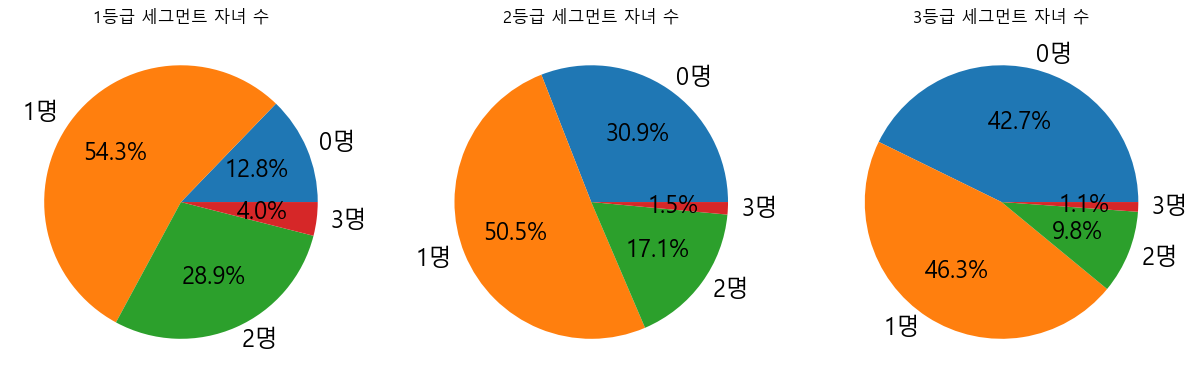

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1행 3열의 서브플롯 생성
ag = ['0명', '1명', '2명', '3명']

# 서브플롯
for i in range(1, 4):
    ch_i = ch_0[ch_0['rfm_segment']==i]
    # ch_i = ch_i.T
    # ch_i = ch_i.iloc[2,:]
    
    # 파이차트 그리기
    ch_i[0].plot(
        kind='pie',
        y=ch_i.columns[1],
        autopct='%.1f%%',
        # labels=[''] * len(concat_i),
        title=f'{i}등급 세그먼트 자녀 수',
        ylabel='',
        labels=[f'{x}' for x in ag],
        textprops={'fontsize': 17},
        legend=False,
        ax = axes[i-1])

plt.show()

In [70]:
unique_cate = df['matrimony'].unique()
print(unique_cate)

['미혼' '배우자 있음' '이혼' '사별']


In [71]:
m = df.groupby(['rfm_segment','matrimony']).size()
m = pd.DataFrame(m)
m = m.reset_index()
m

,rfm_segment,matrimony,0
0,1,미혼,183
1,1,배우자 있음,525
2,1,사별,18
3,1,이혼,80
4,2,미혼,136
5,2,배우자 있음,393
6,2,사별,20
7,2,이혼,65
8,3,미혼,158
9,3,배우자 있음,511


In [72]:
m_1 = m[m['rfm_segment'] == 1]
m_1 = m_1.T
m_1

,0,1,2,3
rfm_segment,1,1,1,1
matrimony,미혼,배우자 있음,사별,이혼
0,183,525,18,80


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20520\4175167088.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  m_i.plot(
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20520\4175167088.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  m_i.plot(
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20520\4175167088.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, se

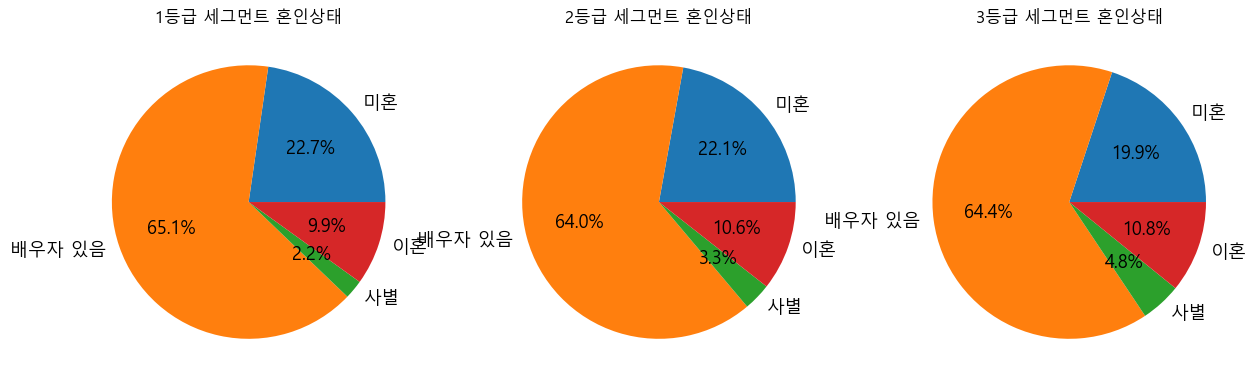

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1행 3열의 서브플롯 생성
ag = ['미혼', '배우자 있음', '사별', '이혼']

# 서브플롯
for i in range(1, 4):
    m_i = m[m['rfm_segment']==i]
    m_i = m_i.T
    m_i = m_i.iloc[2,:]
    
    # 파이차트 그리기
    m_i.plot(
        kind='pie',
        # y=ch_i.columns[0],
        autopct='%.1f%%',
        title=f'{i}등급 세그먼트 혼인상태',
        ylabel='',
        labels=[f'{x}' for x in ag],
        legend=False,
        textprops={'fontsize': 13},
        ax = axes[i-1])

plt.show()